In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import re

# set the graphs to show in the jupyter notebook
%matplotlib inline

# set seabor graphs to a better style
sns.set(style="ticks")

### Question 1

In [2]:
customer = pd.read_csv('D:\python\proj_3\Customer.csv')

In [3]:
prod = pd.read_csv('D:\python\proj_3\prod_cat_info.csv')

In [4]:
trans = pd.read_csv('D:\python\proj_3\Transactions.csv')

In [5]:
prod.head(2)

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women


In [6]:
Mix_2.head(2)

NameError: name 'Mix_2' is not defined

In [8]:
Mix_2 = pd.merge(left=customer,right=trans,how='right',left_on='customer_Id',right_on='cust_id')

In [9]:
Customer_final = pd.merge(left=Mix_2,right=prod,how='left',left_on=['prod_cat_code','prod_subcat_code'],right_on=['prod_cat_code','prod_sub_cat_code'])

### Question 2

In [10]:
# a)

Customer_final.dtypes

customer_Id            int64
DOB                   object
Gender                object
city_code            float64
transaction_id         int64
cust_id                int64
tran_date             object
prod_subcat_code       int64
prod_cat_code          int64
Qty                    int64
Rate                   int64
Tax                  float64
total_amt            float64
Store_type            object
prod_cat              object
prod_sub_cat_code      int64
prod_subcat           object
dtype: object

In [11]:
Customer_final['tran_date'] = pd.to_datetime(Customer_final['tran_date'])

In [12]:
# b)

top_10 = Customer_final.head(10)
bot_10 = Customer_final.tail(10)

In [17]:
# c)

five_number_summary = Customer_final.describe().loc['min' : 'max',:]

In [18]:
five_number_summary

,customer_Id,city_code,transaction_id,cust_id,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,prod_sub_cat_code
min,266783.0,1.0,3.268991e+06,266783.0,1.0,1.0,-5.0,-1499.0,7.350,-8270.925,1.0
25%,268935.0,3.0,2.493864e+10,268935.0,3.0,2.0,1.0,312.0,98.280,762.450,3.0
50%,270980.0,5.0,5.009313e+10,270980.0,5.0,4.0,3.0,710.0,199.080,1754.740,5.0
75%,273114.0,8.0,7.533000e+10,273114.0,10.0,5.0,4.0,1109.0,365.715,3569.150,10.0
max,275265.0,10.0,9.998755e+10,275265.0,12.0,6.0,5.0,1500.0,787.500,8287.500,12.0


In [19]:
Customer_final.shape

(23053, 17)

In [20]:
# d)

Customer_final.columns.value_counts()

Rate                 1
prod_subcat_code     1
cust_id              1
prod_cat_code        1
transaction_id       1
total_amt            1
prod_sub_cat_code    1
customer_Id          1
Gender               1
prod_subcat          1
Store_type           1
Tax                  1
tran_date            1
city_code            1
Qty                  1
prod_cat             1
DOB                  1
dtype: int64

In [21]:
Customer_final.duplicated().sum()

13

In [22]:
Customer_final.drop_duplicates(inplace=True)

In [23]:
Customer_final.duplicated().sum()

0

In [24]:
Customer_final.isna().sum()

customer_Id          0
DOB                  0
Gender               9
city_code            8
transaction_id       0
cust_id              0
tran_date            0
prod_subcat_code     0
prod_cat_code        0
Qty                  0
Rate                 0
Tax                  0
total_amt            0
Store_type           0
prod_cat             0
prod_sub_cat_code    0
prod_subcat          0
dtype: int64

In [30]:
Customer_final.loc[: , Customer_final.dtypes == 'object'].describe()

,DOB,Gender,Store_type,prod_cat,prod_subcat
count,23040,23031,23040,23040,23040
unique,3987,2,4,6,18
top,27-12-1988,M,e-Shop,Books,Women
freq,32,11804,9304,6066,3046


### Question 3

In [32]:
cont_var = Customer_final.loc[: , Customer_final.dtypes == 'float']

In [35]:
cont_var.columns

Index(['city_code', 'Tax', 'total_amt'], dtype='object')

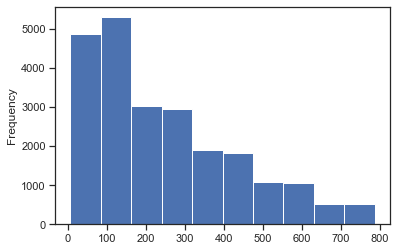

In [39]:
cont_var['Tax'].plot(kind = 'hist')
plt.show()

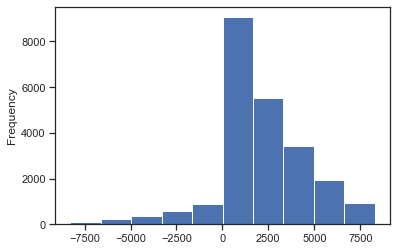

In [38]:
cont_var['total_amt'].plot(kind = 'hist')
plt.show()

In [40]:
cat_var = Customer_final.loc[: , Customer_final.dtypes == 'object']

In [41]:
cat_var.columns

Index(['DOB', 'Gender', 'Store_type', 'prod_cat', 'prod_subcat'], dtype='object')

C:\Users\akhil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


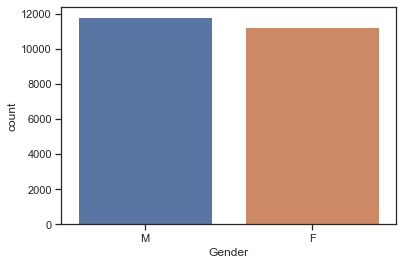

In [47]:
sns.countplot(cat_var['Gender'])
plt.show()

C:\Users\akhil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


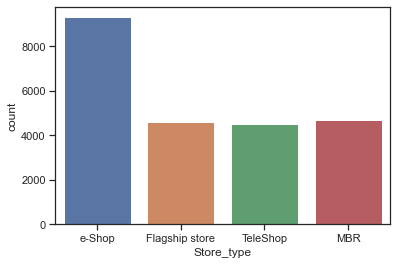

In [48]:
sns.countplot(cat_var['Store_type'])
plt.show()

C:\Users\akhil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


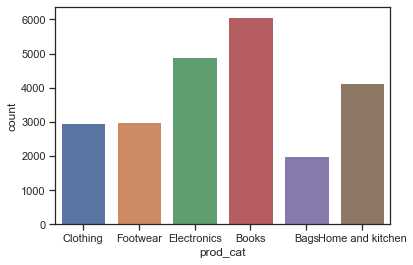

In [50]:
sns.countplot(cat_var['prod_cat'])
plt.show()

C:\Users\akhil\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


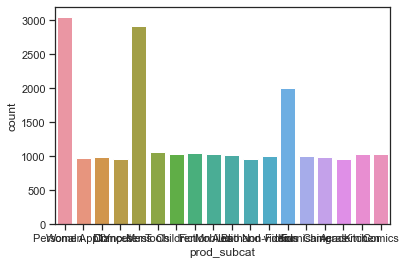

In [51]:
sns.countplot(cat_var['prod_subcat'])
plt.show()

### Question 4

In [80]:
# a)

cust_sort = Customer_final.sort_values(by = 'tran_date')

In [81]:
cust_sort.tail()

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
721,267025,12-08-1976,F,8.0,38821078489,267025,2014-12-02,10,6,4,933,391.86,4123.86,e-Shop,Home and kitchen,10,Kitchen
729,268100,26-02-1991,M,1.0,23525861068,268100,2014-12-02,1,2,3,1318,415.17,4369.17,TeleShop,Footwear,1,Mens
735,266794,28-02-1971,F,9.0,15403541663,266794,2014-12-02,3,2,2,322,67.62,711.62,e-Shop,Footwear,3,Women
772,273322,10-06-1983,F,1.0,89214951500,273322,2014-12-02,12,6,1,1166,122.43,1288.43,TeleShop,Home and kitchen,12,Tools
134,267466,06-08-1987,F,7.0,97409887219,267466,2014-12-02,4,4,1,78,8.19,86.19,e-Shop,Bags,4,Women


In [82]:
min_date = Customer_final['tran_date'].min()

In [83]:
max_date = Customer_final['tran_date'].max()

In [84]:
print('Time period of available transaction data is :', min_date ,'to', max_date)

Time period of available transaction data is : 2011-01-02 00:00:00 to 2014-12-02 00:00:00


In [86]:
min_date

Timestamp('2011-01-02 00:00:00')

In [96]:
# b)

neg_amt_trans = Customer_final.loc[Customer_final['total_amt'] < 0 , 'transaction_id'].count()

### Question 5

In [103]:
Customer_final.groupby(['Gender','prod_cat'])[['Qty']].sum().reset_index()

,Gender,prod_cat,Qty
0,F,Bags,2364
1,F,Books,7080
2,F,Clothing,3425
3,F,Electronics,5832
4,F,Footwear,3721
5,F,Home and kitchen,4898
6,M,Bags,2346
7,M,Books,7587
8,M,Clothing,3748
9,M,Electronics,6486


### Question 6

In [113]:
max_cust = Customer_final.groupby('city_code')['cust_id'].count().sort_values(ascending=False)

In [119]:
(max_cust[4.0]/max_cust.sum()) * 100

10.515804098645363

### Question 7

In [130]:
max_prod = Customer_final.groupby('Store_type')[['Qty' , 'Rate']].sum().sort_values(by = 'Qty' ,ascending = False)

In [131]:
max_prod

,Qty,Rate
Store_type,,
e-Shop,22790,5945770
MBR,11195,2953665
Flagship store,11142,2942874
TeleShop,10993,2836359


### Question 8

In [155]:
cust_piv = Customer_final.pivot_table(index='Store_type' , columns='prod_cat' , values = 'total_amt', aggfunc='sum')

In [156]:
cust_piv

prod_cat,Bags,Books,Clothing,Electronics,Footwear,Home and kitchen
Store_type,,,,,,
Flagship store,870548.835,2493677.810,1194423.230,2215136.040,1234806.560,1713004.150
MBR,848678.675,2496039.195,1287686.335,2107969.825,1112163.715,1822403.570
TeleShop,789181.055,2545714.470,1241834.360,1978457.195,1235719.290,1581227.375
e-Shop,1617933.265,5297161.155,2527193.565,4429142.770,2643215.250,3327977.120


In [159]:
tot_amt_earned_8 = cust_piv.loc['Flagship store' , ['Clothing','Electronics']].sum()

### Question 9

In [161]:
cust_piv_9 = Customer_final.pivot_table(index = 'Gender' , columns = 'prod_cat', values = 'total_amt', aggfunc='sum')

In [162]:
cust_piv_9

prod_cat,Bags,Books,Clothing,Electronics,Footwear,Home and kitchen
Gender,,,,,,
F,2079618.84,6174590.825,3026750.805,5019354.21,3203155.215,4133702.235
M,2046722.99,6645972.775,3224079.495,5711351.62,3020200.365,4305169.505


In [165]:
total_earned_male = cust_piv_9.loc['M','Electronics']

In [166]:
total_earned_male

5711351.620000015

### Question 10

In [169]:
no_neg_trans = Customer_final.loc[Customer_final['total_amt'] > 0,:]

In [183]:
unq_trans = no_neg_amt.groupby(['cust_id','prod_cat','prod_subcat'])[['transaction_id']].count().reset_index()

In [185]:
unq_tot = unq_trans.groupby('cust_id')['transaction_id'].count().reset_index()

In [187]:
greater_10 = unq_tot.loc[unq_tot['transaction_id'] > 10,:]

### Question 11

In [1]:
Customer_final['DOB'] = pd.to_datetime(Customer_final['DOB'])

NameError: name 'pd' is not defined

In [ ]:
now = pd.Timestamp(now)

In [227]:
Customer_final['DOB'] = Customer_final['DOB'].where(Customer_final['DOB'] < now , Customer_final['DOB'] - np.timedelta64(100 , 'Y'))

In [230]:
Customer_final['Age'] = (now - Customer_final['DOB']).astype('<m8[Y]')

In [241]:
Customer_final['Age_bin'] = pd.cut(Customer_final['Age'] , bins=[24,35,45,55] , labels=['25-35' , '36-44' , '45-55'] , include_lowest= True)

In [242]:
Customer_final.head(3)

,customer_Id,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat,Age,Age_bin
0,270351,1981-09-26,M,5.0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,1,Women,39.0,36-44
1,270351,1981-09-26,M,5.0,80712190438,270351,2014-02-20,1,1,5,772,405.300,4265.300,e-Shop,Clothing,1,Women,39.0,36-44
2,270351,1981-09-26,M,5.0,36957441426,270351,2013-09-16,3,2,3,361,113.715,1196.715,Flagship store,Footwear,3,Women,39.0,36-44


In [250]:
cust_age = Customer_final.groupby(['Age_bin' , 'prod_cat'])['total_amt'].sum()

In [257]:
# a)

cust_age.loc['25-35',['Books','Electronics']].sum()

8017556.235000001

In [263]:
# b)

cust_25_35 = Customer_final[Customer_final['Age_bin'] == '25-35']
totalamt_25_35 = cust_25_35[(cust_25_35['tran_date'] >= '2014-01-1') & (cust_25_35['tran_date'] <= '2014-03-1')]

In [264]:
totalamt_25_35['total_amt'].sum()

544868.8700000001